In [1]:
!pip install datasets -U
!pip install transformers -U
!pip install accelerate -U
!pip install sentencepiece -U
!pip install tqdm -U

In [2]:
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/SMM4H 2024/SMM4H_2024_Task3_Training_1800.csv')
df_dev = pd.read_csv('/content/drive/MyDrive/SMM4H 2024/SMM4H_2024_Task3_Validation_600_release.csv')

In [3]:
df_train = df_train[:1800]
df_train = df_train.iloc[:, :4]
df_train['Classification'] = df_train['Classification'].astype(int)
df_train

,id,keyword,text,Classification
0,3u2w5k,run,"21/m. I want to experience young love, but I'v...",0
1,3xbury,outside,Having issues talking to a girl whom I enjoyed...,0
2,3y743u,"run, swim, climb",Need some advice for free social activities. I...,0
3,43bvs7,walk,I spoke to her today.. A few weeks ago I met ...,0
4,442ap2,outside,"How to get over Social Anxiety?. Hello, The ot...",0
...,...,...,...,...
1795,gqzye9,"pool, beach, pool",Social Anxiety: The Essentials. After looking...,3
1796,env299,"outside , outdoors",Eye contact. Being in public. I can't do it. ...,3
1797,e9bnr1s,Jogging,"If you look for the light, you will find it. I...",3
1798,qrmhbe,"walk, swimming, pool","I feel like my SA is ruining my life. Hi, I h...",3


In [4]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base", device_map="auto")
input_text = "translate English to German: How old are you?"
input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to("cuda")
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0]))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have

<pad> Wie old sind Sie?</s>


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1133: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [5]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import pandas as pd
from tqdm.auto import tqdm
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base", device_map="auto").to("cuda")
question_prefix = "Q: The posts were filtered based on a list of nature-related keywords related to outdoor spaces and activities (see annotation guidelines for details). Each post was classified into one of four categories: 1) positive (code = 1) - the nature-related space/activity helps the user's mental well-being, 2) neutral (code = 2) - the nature keyword is referencing nature, however, the user makes no mention of it having a positive or negative effect on the user's mental well-being, 3) negative (code = 3) - the nature-related space/activity has a negative effect on the user's mental well-being. 4) unrelated (code = 0) - the nature-related keyword does not reference nature (e.g., it is used in a metaphor or idiomatic expression), the user is/has not personally experienced the nature-related keyword, or it. Note, that each post has only one classification. Respond which code is the following text: "
preds = []
for text in tqdm(df_train['text'], desc="Processing rows"):
    input_text = question_prefix + text
    input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to("cuda")
    outputs = model.generate(input_ids)
    preds.append(tokenizer.decode(outputs[0], skip_special_tokens=True))
df_train['pred_dir'] = preds
df_train

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Processing rows:   0%|          | 0/1800 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (636 > 512). Running this sequence through the model will result in indexing errors


,id,keyword,text,Classification,pred_dir
0,3u2w5k,run,"21/m. I want to experience young love, but I'v...",0,negative
1,3xbury,outside,Having issues talking to a girl whom I enjoyed...,0,negative
2,3y743u,"run, swim, climb",Need some advice for free social activities. I...,0,neutral
3,43bvs7,walk,I spoke to her today.. A few weeks ago I met ...,0,positive
4,442ap2,outside,"How to get over Social Anxiety?. Hello, The ot...",0,positive
...,...,...,...,...,...
1795,gqzye9,"pool, beach, pool",Social Anxiety: The Essentials. After looking...,3,neutral
1796,env299,"outside , outdoors",Eye contact. Being in public. I can't do it. ...,3,negative
1797,e9bnr1s,Jogging,"If you look for the light, you will find it. I...",3,negative
1798,qrmhbe,"walk, swimming, pool","I feel like my SA is ruining my life. Hi, I h...",3,negative


In [6]:
print(df_train['pred_dir'].value_counts())

neutral                763
negative               710
positive               325
negative (code = 0)      1
0                        1
Name: pred_dir, dtype: int64


In [7]:
def convert_prediction_to_code(prediction):
    if '0' in prediction or 'unrelated' in prediction:
        return 0
    elif '1' in prediction or 'positive' in prediction:
        return 1
    elif '2' in prediction or 'neutral' in prediction:
        return 2
    elif '3' in prediction or 'negative' in prediction:
        return 3
    else:
        return None  # For any unexpected value
df_train['pred_dir'] = df_train['pred_dir'].apply(convert_prediction_to_code)
df_train

,id,keyword,text,Classification,pred_dir
0,3u2w5k,run,"21/m. I want to experience young love, but I'v...",0,3
1,3xbury,outside,Having issues talking to a girl whom I enjoyed...,0,3
2,3y743u,"run, swim, climb",Need some advice for free social activities. I...,0,2
3,43bvs7,walk,I spoke to her today.. A few weeks ago I met ...,0,1
4,442ap2,outside,"How to get over Social Anxiety?. Hello, The ot...",0,1
...,...,...,...,...,...
1795,gqzye9,"pool, beach, pool",Social Anxiety: The Essentials. After looking...,3,2
1796,env299,"outside , outdoors",Eye contact. Being in public. I can't do it. ...,3,3
1797,e9bnr1s,Jogging,"If you look for the light, you will find it. I...",3,3
1798,qrmhbe,"walk, swimming, pool","I feel like my SA is ruining my life. Hi, I h...",3,3


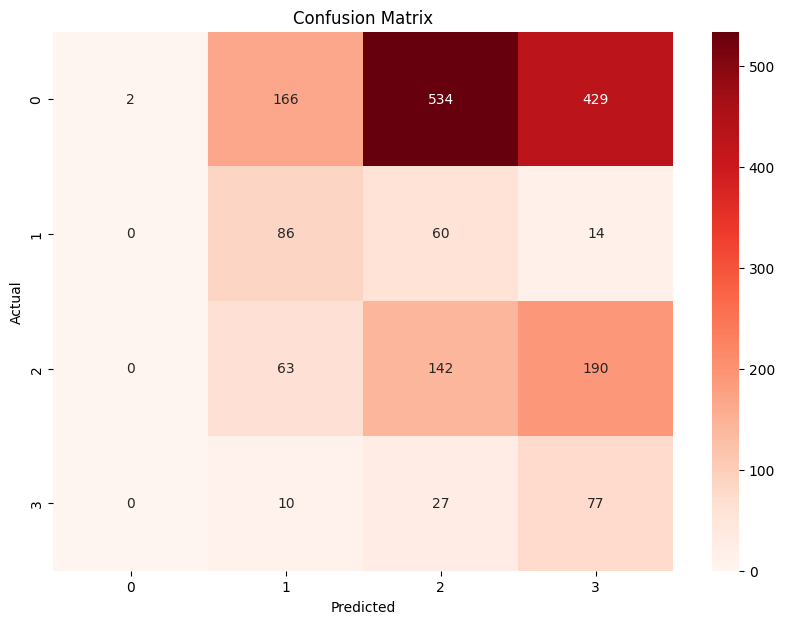

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
actual = df_train['Classification']
predicted = df_train['pred_dir']
cm = confusion_matrix(actual, predicted)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(actual, predicted)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.1706


In [10]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import pandas as pd
from tqdm.auto import tqdm
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base", device_map="auto").to("cuda")
question_prefix = "Q : Does the mention of nature related or outdoor spaces kaywords actually refer to some effect on user's mental health or spaces in this sentence or just as a metaphor or unrelated mention? Answer with just Yes or No. Mere mention of keywords like activities , outdoor spaces etc.. is to classified as No , mention of the same having an effect on the user is a postivie/neutral/negative way should be classified as Yes. : "
preds = []
for text in tqdm(df_train['text'], desc="Processing rows"):
    input_text = question_prefix + text
    input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to("cuda")
    outputs = model.generate(input_ids)
    preds.append(tokenizer.decode(outputs[0], skip_special_tokens=True))
df_train['pred_indir_1'] = preds
df_train

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Processing rows:   0%|          | 0/1800 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1133: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (522 > 512). Running this sequence through the model will result in indexing errors


,id,keyword,text,Classification,pred_dir,pred_indir_1
0,3u2w5k,run,"21/m. I want to experience young love, but I'v...",0,3,No
1,3xbury,outside,Having issues talking to a girl whom I enjoyed...,0,3,No
2,3y743u,"run, swim, climb",Need some advice for free social activities. I...,0,2,No
3,43bvs7,walk,I spoke to her today.. A few weeks ago I met ...,0,1,No
4,442ap2,outside,"How to get over Social Anxiety?. Hello, The ot...",0,1,No
...,...,...,...,...,...,...
1795,gqzye9,"pool, beach, pool",Social Anxiety: The Essentials. After looking...,3,2,Yes
1796,env299,"outside , outdoors",Eye contact. Being in public. I can't do it. ...,3,3,Yes
1797,e9bnr1s,Jogging,"If you look for the light, you will find it. I...",3,3,No
1798,qrmhbe,"walk, swimming, pool","I feel like my SA is ruining my life. Hi, I h...",3,3,No


In [11]:
print(df_train['pred_indir_1'].value_counts())

No     1157
Yes     643
Name: pred_indir_1, dtype: int64


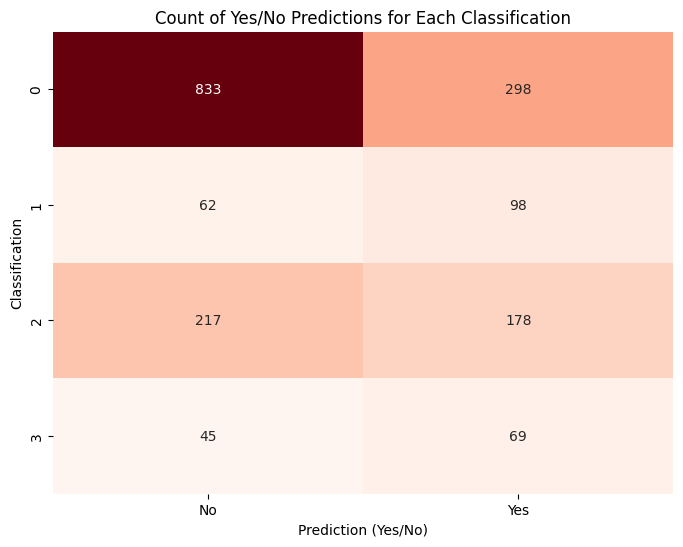

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
count_matrix = df_train.groupby(['Classification', 'pred_indir_1']).size().unstack(fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(count_matrix, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title('Count of Yes/No Predictions for Each Classification')
plt.ylabel('Classification')
plt.xlabel('Prediction (Yes/No)')
plt.show()

In [13]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import pandas as pd
from tqdm.auto import tqdm
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base", device_map="auto").to("cuda")
question_prefix = "Q : Does the mention of nature related or outdoor spaces keywords affect the user in a posistive/neutral/negative way ? Respond with one of the following based on input text : Positive / Neutral / Negative : "
preds = []
for text in tqdm(df_train['text'], desc="Processing rows"):
    input_text = question_prefix + text
    input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to("cuda")
    outputs = model.generate(input_ids)
    preds.append(tokenizer.decode(outputs[0], skip_special_tokens=True))
df_train['pred_indir_2'] = preds
df_train

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Processing rows:   0%|          | 0/1800 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1133: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (640 > 512). Running this sequence through the model will result in indexing errors


,id,keyword,text,Classification,pred_dir,pred_indir_1,pred_indir_2
0,3u2w5k,run,"21/m. I want to experience young love, but I'v...",0,3,No,Positive
1,3xbury,outside,Having issues talking to a girl whom I enjoyed...,0,3,No,Neutral
2,3y743u,"run, swim, climb",Need some advice for free social activities. I...,0,2,No,Neutral
3,43bvs7,walk,I spoke to her today.. A few weeks ago I met ...,0,1,No,Positive
4,442ap2,outside,"How to get over Social Anxiety?. Hello, The ot...",0,1,No,Positive
...,...,...,...,...,...,...,...
1795,gqzye9,"pool, beach, pool",Social Anxiety: The Essentials. After looking...,3,2,Yes,Positive
1796,env299,"outside , outdoors",Eye contact. Being in public. I can't do it. ...,3,3,Yes,Neutral
1797,e9bnr1s,Jogging,"If you look for the light, you will find it. I...",3,3,No,Positive
1798,qrmhbe,"walk, swimming, pool","I feel like my SA is ruining my life. Hi, I h...",3,3,No,Negative


In [14]:
print(df_train['pred_indir_2'].value_counts())

Positive                         1051
Neutral                           573
Negative                          175
Positive / Neutral / Negative       1
Name: pred_indir_2, dtype: int64


In [15]:
def convert_prediction_to_code(prediction):
    if '1' in prediction or 'Positive' in prediction:
        return 1
    elif '2' in prediction or 'Neutral' in prediction:
        return 2
    elif '3' in prediction or 'Negative' in prediction:
        return 3
    else:
        return -1  # For any unexpected value
df_train['pred_indir_2'] = df_train['pred_indir_2'].apply(convert_prediction_to_code)
df_train

,id,keyword,text,Classification,pred_dir,pred_indir_1,pred_indir_2
0,3u2w5k,run,"21/m. I want to experience young love, but I'v...",0,3,No,1
1,3xbury,outside,Having issues talking to a girl whom I enjoyed...,0,3,No,2
2,3y743u,"run, swim, climb",Need some advice for free social activities. I...,0,2,No,2
3,43bvs7,walk,I spoke to her today.. A few weeks ago I met ...,0,1,No,1
4,442ap2,outside,"How to get over Social Anxiety?. Hello, The ot...",0,1,No,1
...,...,...,...,...,...,...,...
1795,gqzye9,"pool, beach, pool",Social Anxiety: The Essentials. After looking...,3,2,Yes,1
1796,env299,"outside , outdoors",Eye contact. Being in public. I can't do it. ...,3,3,Yes,2
1797,e9bnr1s,Jogging,"If you look for the light, you will find it. I...",3,3,No,1
1798,qrmhbe,"walk, swimming, pool","I feel like my SA is ruining my life. Hi, I h...",3,3,No,3


In [16]:
def convert_prediction_to_code(prediction):
    if '1' in prediction or 'Yes' in prediction:
        return 1
    else:
        return 0  # For any unexpected value
df_train['pred_indir_1'] = df_train['pred_indir_1'].apply(convert_prediction_to_code)
df_train

,id,keyword,text,Classification,pred_dir,pred_indir_1,pred_indir_2
0,3u2w5k,run,"21/m. I want to experience young love, but I'v...",0,3,0,1
1,3xbury,outside,Having issues talking to a girl whom I enjoyed...,0,3,0,2
2,3y743u,"run, swim, climb",Need some advice for free social activities. I...,0,2,0,2
3,43bvs7,walk,I spoke to her today.. A few weeks ago I met ...,0,1,0,1
4,442ap2,outside,"How to get over Social Anxiety?. Hello, The ot...",0,1,0,1
...,...,...,...,...,...,...,...
1795,gqzye9,"pool, beach, pool",Social Anxiety: The Essentials. After looking...,3,2,1,1
1796,env299,"outside , outdoors",Eye contact. Being in public. I can't do it. ...,3,3,1,2
1797,e9bnr1s,Jogging,"If you look for the light, you will find it. I...",3,3,0,1
1798,qrmhbe,"walk, swimming, pool","I feel like my SA is ruining my life. Hi, I h...",3,3,0,3


In [17]:
import numpy as np
df_train['pred_indir'] = np.where(df_train['pred_indir_1'] == 0, 0, df_train['pred_indir_2'])
df_train

,id,keyword,text,Classification,pred_dir,pred_indir_1,pred_indir_2,pred_indir
0,3u2w5k,run,"21/m. I want to experience young love, but I'v...",0,3,0,1,0
1,3xbury,outside,Having issues talking to a girl whom I enjoyed...,0,3,0,2,0
2,3y743u,"run, swim, climb",Need some advice for free social activities. I...,0,2,0,2,0
3,43bvs7,walk,I spoke to her today.. A few weeks ago I met ...,0,1,0,1,0
4,442ap2,outside,"How to get over Social Anxiety?. Hello, The ot...",0,1,0,1,0
...,...,...,...,...,...,...,...,...
1795,gqzye9,"pool, beach, pool",Social Anxiety: The Essentials. After looking...,3,2,1,1,1
1796,env299,"outside , outdoors",Eye contact. Being in public. I can't do it. ...,3,3,1,2,2
1797,e9bnr1s,Jogging,"If you look for the light, you will find it. I...",3,3,0,1,0
1798,qrmhbe,"walk, swimming, pool","I feel like my SA is ruining my life. Hi, I h...",3,3,0,3,0


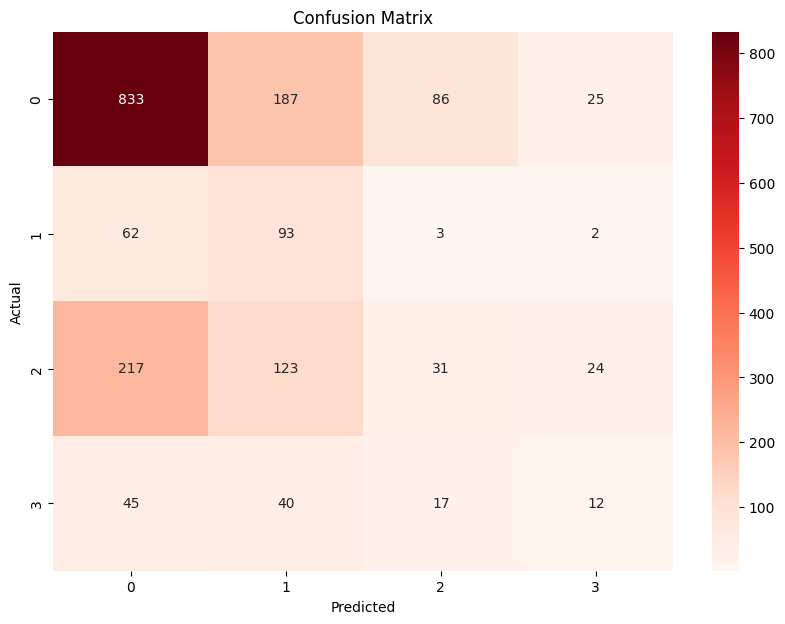

Accuracy: 0.5383


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
actual = df_train['Classification']
predicted = df_train['pred_indir']
cm = confusion_matrix(actual, predicted)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(actual, predicted)
print(f"Accuracy: {accuracy:.4f}")

In [19]:
#same indirect predictions on dev set

In [20]:
df_dev

,id,keyword,text,Label
0,3p7iya,bay,Advice and tips on how to improve my public s...,NaN
1,3qm3au,run,"Getting into a new social life (moving out, n...",NaN
2,3sy0nb,"river, river","Do any of you guys have moments of clarity, wh...",NaN
3,3y7rva,running,Self worth and anxiety. Hi guys. 25 (M) I am n...,NaN
4,43xj5z,"coast, coast",I feel like life's going to pass me by.. Eith...,NaN
...,...,...,...,...
595,rrb9y6,outside,"I just moved out alone, and I'm terrified of e...",NaN
596,rwa3vy,run,Need advice on how to help my best friend with...,NaN
597,s11dzj,run,Is it just me or is it normal for people to be...,NaN
598,t0wlip,stream,It looks like I am giving up because of my so...,NaN


In [21]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import pandas as pd
from tqdm.auto import tqdm
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base", device_map="auto").to("cuda")
question_prefix = "Q : Does the mention of nature related or outdoor spaces kaywords actually refer to some effect on user's mental health or spaces in this sentence or just as a metaphor or unrelated mention? Answer with just Yes or No. Mere mention of keywords like activities , outdoor spaces etc.. is to classified as No , mention of the same having an effect on the user is a postivie/neutral/negative way should be classified as Yes. : "
preds = []
for text in tqdm(df_dev['text'], desc="Processing rows"):
    input_text = question_prefix + text
    input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to("cuda")
    outputs = model.generate(input_ids)
    preds.append(tokenizer.decode(outputs[0], skip_special_tokens=True))
df_dev['pred_indir_1'] = preds
df_dev

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Processing rows:   0%|          | 0/600 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1133: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512). Running this sequence through the model will result in indexing errors


,id,keyword,text,Label,pred_indir_1
0,3p7iya,bay,Advice and tips on how to improve my public s...,NaN,No
1,3qm3au,run,"Getting into a new social life (moving out, n...",NaN,Yes
2,3sy0nb,"river, river","Do any of you guys have moments of clarity, wh...",NaN,No
3,3y7rva,running,Self worth and anxiety. Hi guys. 25 (M) I am n...,NaN,No
4,43xj5z,"coast, coast",I feel like life's going to pass me by.. Eith...,NaN,No
...,...,...,...,...,...
595,rrb9y6,outside,"I just moved out alone, and I'm terrified of e...",NaN,Yes
596,rwa3vy,run,Need advice on how to help my best friend with...,NaN,No
597,s11dzj,run,Is it just me or is it normal for people to be...,NaN,No
598,t0wlip,stream,It looks like I am giving up because of my so...,NaN,No


In [22]:
print(df_train['pred_indir_1'].value_counts())

0    1157
1     643
Name: pred_indir_1, dtype: int64


In [23]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import pandas as pd
from tqdm.auto import tqdm
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base", device_map="auto").to("cuda")
question_prefix = "Q : Does the mention of nature related or outdoor spaces keywords affect the user in a posistive/neutral/negative way ? Respond with one of the following based on input text : Positive / Neutral / Negative : "
preds = []
for text in tqdm(df_dev['text'], desc="Processing rows"):
    input_text = question_prefix + text
    input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to("cuda")
    outputs = model.generate(input_ids)
    preds.append(tokenizer.decode(outputs[0], skip_special_tokens=True))
df_dev['pred_indir_2'] = preds
df_dev

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Processing rows:   0%|          | 0/600 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1133: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (528 > 512). Running this sequence through the model will result in indexing errors


,id,keyword,text,Label,pred_indir_1,pred_indir_2
0,3p7iya,bay,Advice and tips on how to improve my public s...,NaN,No,Positive
1,3qm3au,run,"Getting into a new social life (moving out, n...",NaN,Yes,Negative
2,3sy0nb,"river, river","Do any of you guys have moments of clarity, wh...",NaN,No,Positive
3,3y7rva,running,Self worth and anxiety. Hi guys. 25 (M) I am n...,NaN,No,Positive
4,43xj5z,"coast, coast",I feel like life's going to pass me by.. Eith...,NaN,No,Negative
...,...,...,...,...,...,...
595,rrb9y6,outside,"I just moved out alone, and I'm terrified of e...",NaN,Yes,Neutral
596,rwa3vy,run,Need advice on how to help my best friend with...,NaN,No,Positive
597,s11dzj,run,Is it just me or is it normal for people to be...,NaN,No,Positive
598,t0wlip,stream,It looks like I am giving up because of my so...,NaN,No,Neutral


In [24]:
print(df_dev['pred_indir_2'].value_counts())

Positive                         369
Neutral                          168
Negative                          62
Positive / Neutral / Negative      1
Name: pred_indir_2, dtype: int64


In [25]:
df_dev.dtypes

id               object
keyword          object
text             object
Label           float64
pred_indir_1     object
pred_indir_2     object
dtype: object

In [26]:
def convert_prediction_to_code_2(prediction):
    if 'Positive' == prediction:
        return 1
    elif 'Neutral' == prediction:
        return 2
    elif 'Negative' == prediction:
        return 3
    else:
        return 2  # For any unexpected value
df_dev['pred_indir_2'] = df_dev['pred_indir_2'].apply(convert_prediction_to_code_2)
df_dev

,id,keyword,text,Label,pred_indir_1,pred_indir_2
0,3p7iya,bay,Advice and tips on how to improve my public s...,NaN,No,1
1,3qm3au,run,"Getting into a new social life (moving out, n...",NaN,Yes,3
2,3sy0nb,"river, river","Do any of you guys have moments of clarity, wh...",NaN,No,1
3,3y7rva,running,Self worth and anxiety. Hi guys. 25 (M) I am n...,NaN,No,1
4,43xj5z,"coast, coast",I feel like life's going to pass me by.. Eith...,NaN,No,3
...,...,...,...,...,...,...
595,rrb9y6,outside,"I just moved out alone, and I'm terrified of e...",NaN,Yes,2
596,rwa3vy,run,Need advice on how to help my best friend with...,NaN,No,1
597,s11dzj,run,Is it just me or is it normal for people to be...,NaN,No,1
598,t0wlip,stream,It looks like I am giving up because of my so...,NaN,No,2


In [27]:
def convert_prediction_to_code_2(prediction):
    if '1' in prediction or 'Yes' in prediction:
        return 1
    else:
        return 0  # For any unexpected value
df_dev['pred_indir_1'] = df_dev['pred_indir_1'].apply(convert_prediction_to_code_2)
df_dev

,id,keyword,text,Label,pred_indir_1,pred_indir_2
0,3p7iya,bay,Advice and tips on how to improve my public s...,NaN,0,1
1,3qm3au,run,"Getting into a new social life (moving out, n...",NaN,1,3
2,3sy0nb,"river, river","Do any of you guys have moments of clarity, wh...",NaN,0,1
3,3y7rva,running,Self worth and anxiety. Hi guys. 25 (M) I am n...,NaN,0,1
4,43xj5z,"coast, coast",I feel like life's going to pass me by.. Eith...,NaN,0,3
...,...,...,...,...,...,...
595,rrb9y6,outside,"I just moved out alone, and I'm terrified of e...",NaN,1,2
596,rwa3vy,run,Need advice on how to help my best friend with...,NaN,0,1
597,s11dzj,run,Is it just me or is it normal for people to be...,NaN,0,1
598,t0wlip,stream,It looks like I am giving up because of my so...,NaN,0,2


In [28]:
import numpy as np
df_dev['Label'] = np.where(df_dev['pred_indir_1'] == 0, 0, df_dev['pred_indir_2'])
df_dev

,id,keyword,text,Label,pred_indir_1,pred_indir_2
0,3p7iya,bay,Advice and tips on how to improve my public s...,0,0,1
1,3qm3au,run,"Getting into a new social life (moving out, n...",3,1,3
2,3sy0nb,"river, river","Do any of you guys have moments of clarity, wh...",0,0,1
3,3y7rva,running,Self worth and anxiety. Hi guys. 25 (M) I am n...,0,0,1
4,43xj5z,"coast, coast",I feel like life's going to pass me by.. Eith...,0,0,3
...,...,...,...,...,...,...
595,rrb9y6,outside,"I just moved out alone, and I'm terrified of e...",2,1,2
596,rwa3vy,run,Need advice on how to help my best friend with...,0,0,1
597,s11dzj,run,Is it just me or is it normal for people to be...,0,0,1
598,t0wlip,stream,It looks like I am giving up because of my so...,0,0,2


In [29]:
print(df_dev['Label'].value_counts())

0    369
1    157
2     50
3     24
Name: Label, dtype: int64


In [31]:
df_dev.to_csv('FlanT5-Task3-001-preds.csv')

In [30]:
{ cbnskcnn = ;#} stop here

SyntaxError: invalid syntax (<ipython-input-30-7b07407d4112>, line 1)

In [ ]:
"""from transformers import pipeline
qa_model = pipeline("question-answering", "timpal0l/mdeberta-v3-base-squad2")
question = "Where do I live?"
context = "My name is Tim and I live in Sweden."
qa_model(question = question, context = context)
# {'score': 0.975547730922699, 'start': 28, 'end': 36, 'answer': ' Sweden.'}""""

In [ ]:
"""from transformers import pipeline
import pandas as pd
qa_model = pipeline("question-answering", "timpal0l/mdeberta-v3-base-squad2")
question = "The training data set contains 1800 posts from the r/socialanxiety subreddit. The posts were filtered based on a list of nature-related keywords related to outdoor spaces and activities (see annotation guidelines for details). Each post was classified into one of four categories: 1) positive (code = 1) - the nature-related space/activity helps the user's mental well-being, 2) neutral (code = 2)  - the nature keyword is referencing nature, however, the user makes no mention of it having a positive or negative effect on the user's mental well-being, 3) negative (code = 3) - the nature-related space/activity has a negative effect on the user's mental well-being. 4) unrelated (code = 0) - the nature-related keyword does not reference nature (e.g., it is used in a metaphor or idiomatic expression), the user is/has not personally experienced the nature-related keyword, or it. Note, that each post has only one classification. what code does the text belong to?"
def get_answer(row):
    try:
        result = qa_model(question=question, context=row['text'])
        return result['answer']  # You may want to customize this part to extract the code from the answer if necessary
    except Exception as e:
        return f"Error: {e}"
df_train['pred_1'] = df_train.apply(get_answer, axis=1)
df_train"""

In [ ]:
"""from transformers import AutoTokenizer, AutoModelForQuestionAnswering, pipeline
tokenizer = AutoTokenizer.from_pretrained("AmazonScience/qanlu")
model = AutoModelForQuestionAnswering.from_pretrained("AmazonScience/qanlu")
qa_pipeline = pipeline('question-answering', model=model, tokenizer=tokenizer)
qa_input = {
  'context': 'Yes. No. I want a cheap flight to Boston.',
  'question': "The training data set contains 1800 posts from the r/socialanxiety subreddit. The posts were filtered based on a list of nature-related keywords related to outdoor spaces and activities (see annotation guidelines for details). Each post was classified into one of four categories: 1) positive (code = 1) - the nature-related space/activity helps the user's mental well-being, 2) neutral (code = 2)  - the nature keyword is referencing nature, however, the user makes no mention of it having a positive or negative effect on the user's mental well-being, 3) negative (code = 3) - the nature-related space/activity has a negative effect on the user's mental well-being. 4) unrelated (code = 0) - the nature-related keyword does not reference nature (e.g., it is used in a metaphor or idiomatic expression), the user is/has not personally experienced the nature-related keyword, or it. Note, that each post has only one classification. what code does the text belong to?"
}
answer = qa_pipeline(qa_input)
answer"""

In [ ]:
"""from transformers import AutoTokenizer, AutoModelForQuestionAnswering, pipeline
import pandas as pd
from tqdm.auto import tqdm
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = AutoTokenizer.from_pretrained("AmazonScience/qanlu")
model = AutoModelForQuestionAnswering.from_pretrained("AmazonScience/qanlu").to(device)
qa_pipeline = pipeline('question-answering', model=model, tokenizer=tokenizer, device=0 if device == "cuda" else -1)
question = "The posts were filtered based on a list of nature-related keywords related to outdoor spaces and activities (see annotation guidelines for details). Each post was classified into one of four categories: 1) positive (code = 1) - the nature-related space/activity helps the user's mental well-being, 2) neutral (code = 2) - the nature keyword is referencing nature, however, the user makes no mention of it having a positive or negative effect on the user's mental well-being, 3) negative (code = 3) - the nature-related space/activity has a negative effect on the user's mental well-being. 4) unrelated (code = 0) - the nature-related keyword does not reference nature (e.g., it is used in a metaphor or idiomatic expression), the user is/has not personally experienced the nature-related keyword, or it. Note, that each post has only one classification."
preds = []
for index, row in tqdm(df_train.iterrows(), total=df_train.shape[0], desc="Processing rows"):
    qa_input = {
        'context': "Code = 0. Code = 1. Code = 2. Code = 3. " + row['text'],  # Ensure space after "Code=3."
        'question': "Code = 0. Code = 1. Code = 2. Code = 3. " + question
    }
    answer = qa_pipeline(qa_input)
    preds.append(answer['answer'])  # Append the model's answer to preds
df_train['pred_01'] = preds
df_train"""